# 1 Explore pre-trained word vectors. Explore word relationships using vector arithmetic. Perform arithmetic operations and analyze results.


In [1]:
import gensim.downloader as api

def load_word_vectors():
    print("Loading pre-trained word vectors...")
    model = api.load("word2vec-google-news-300")  
    print("Model loaded successfully!")
    return model

def vector_arithmetic(model):
    print("\nExploring word relationships using vector arithmetic:")
    
    result = model.most_similar(positive=["GOOD", "BAD"], negative=["HAPPY"], topn=1)
    print("boy - man + woman =", result)
    
    result = model.most_similar(positive=["Delhi", "Australia"], negative=["India"], topn=1)
    print("Paris - France + Italy =", result)
    
    result = model.most_similar(positive=["walking", "run"], negative=["walk"], topn=1)
    print("walking - walk + run =", result)
    
def main():
    model = load_word_vectors()
    vector_arithmetic(model)

if __name__ == "__main__":
    main()

Loading pre-trained word vectors...
Model loaded successfully!

Exploring word relationships using vector arithmetic:
boy - man + woman = [('TERRIBLE', 0.45916804671287537)]
Paris - France + Italy = [('Sydney', 0.7283503413200378)]
walking - walk + run = [('running', 0.6465737223625183)]


# 2 Use dimensionality reduction (e.g., PCA or t-SNE) to visualize word embeddings for Q 1. Select 10 words from a specific domain (e.g., sports, technology) and visualize their embeddings. Analyze clusters and relationships. Generate contextually rich outputs using embeddings. Write a program to generate 5 semantically similar words for a given input. 

Loading model...
Model loaded successfully!


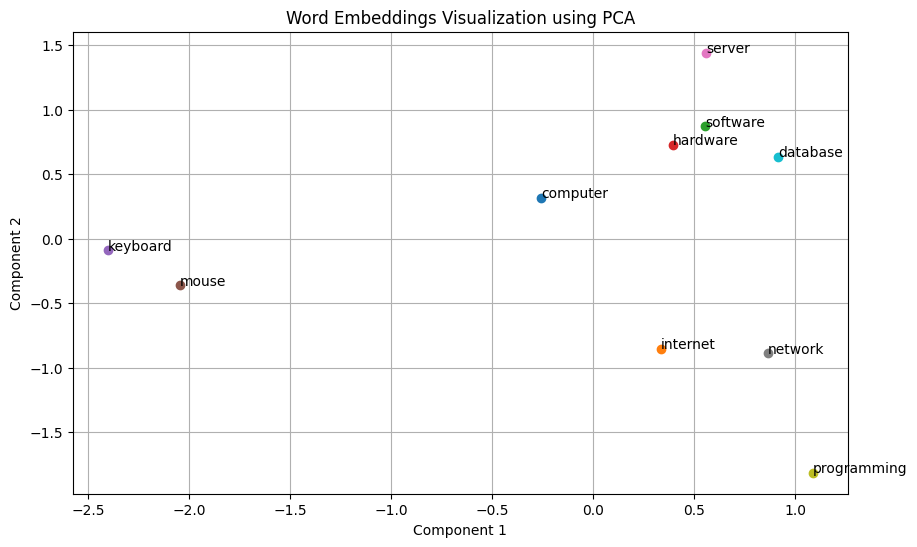

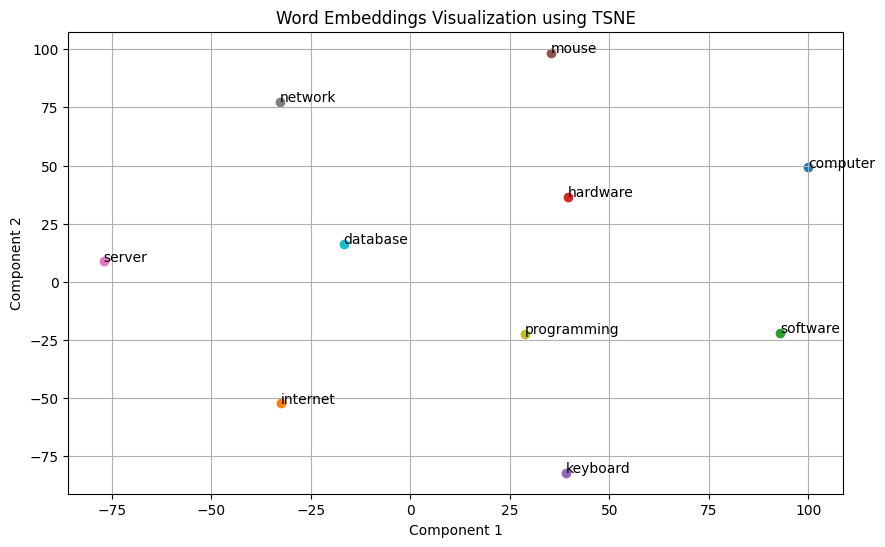


Top 5 words similar to 'computer':
computers: 0.7979
laptop: 0.6640
laptop_computer: 0.6549
Computer: 0.6473
com_puter: 0.6082


In [2]:
import gensim.downloader as api
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

print("Loading model...")
model = api.load("word2vec-google-news-300")
print("Model loaded successfully!")


words = ['computer', 'internet', 'software', 'hardware', 'keyboard', 'mouse', 'server', 'network', 'programming', 'database']
vectors = np.array([model[word] for word in words])


for method in ['PCA', 'TSNE']:
    if method == 'PCA':
        reducer = PCA(n_components=2)
    else:
        reducer = TSNE(n_components=2, random_state=42, perplexity=min(30, len(words) - 1))
    
    reduced_vectors = reducer.fit_transform(vectors)
    

    plt.figure(figsize=(10, 6))
    for i, word in enumerate(words):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
        plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))
    plt.title(f"Word Embeddings Visualization using {method}")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)
    plt.show()

input_word = 'computer'
similar_words = model.most_similar(input_word, topn=5)

print(f"\nTop 5 words similar to '{input_word}':")
for word, score in similar_words:
    print(f"{word}: {score:.4f}")


# 3 Train a custom Word2Vec model on a small dataset. Train embeddings on a domain-specific corpus (e.g., legal, medical) and analyze how embeddings capture domain-specific semantics. 

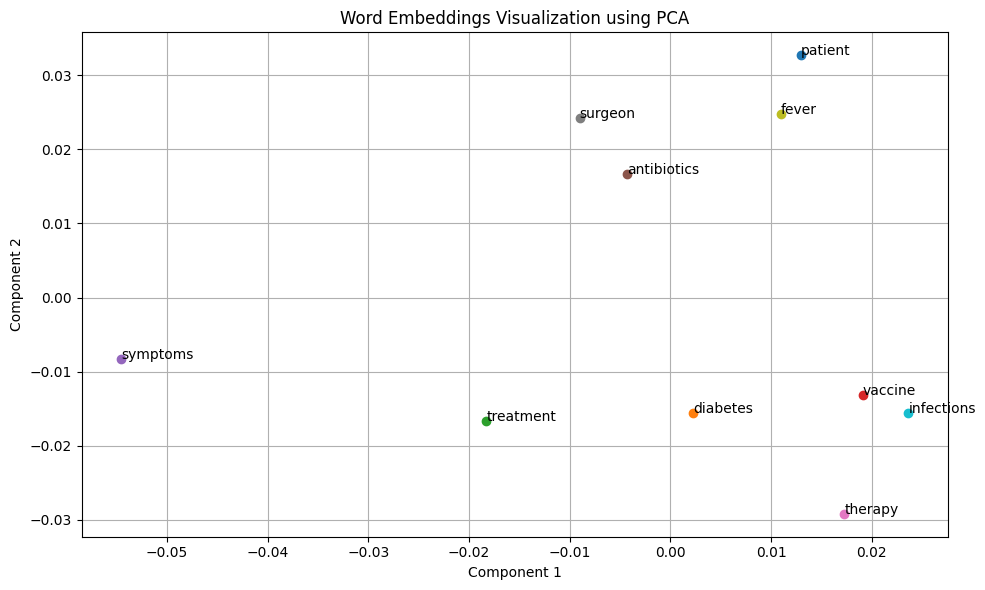

Words similar to 'treatment':
  results (0.32)
  effective (0.19)
  a (0.18)
  symptoms (0.18)
  recommend (0.17)
Words similar to 'diagnosis':
  vaccine (0.18)
  effective (0.17)
  pain (0.17)
  several (0.14)
  rare (0.14)


In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from gensim.models import Word2Vec
import re

medical_corpus = [
    "The patient was diagnosed with diabetes and hypertension.",
    "MRI scans reveal abnormalities in the brain tissue.",
    "The treatment involves antibiotics and regular monitoring.",
    "Symptoms include fever, fatigue, and muscle pain.",
    "The vaccine is effective against several viral infections.",
    "Doctors recommend physical therapy for recovery.",
    "The clinical trial results were published in the journal.",
    "The surgeon performed a minimally invasive procedure.",
    "The prescription includes pain relievers and anti-inflammatory drugs.",
    "The diagnosis confirmed a rare genetic disorder."
]

processed_corpus = [re.findall(r'\b\w+\b', sentence.lower()) for sentence in medical_corpus]
model = Word2Vec(sentences=processed_corpus, vector_size=100, window=5, min_count=1, workers=4, epochs=50)

words = ["patient", "diabetes", "treatment", "vaccine", "symptoms",
         "antibiotics", "therapy", "surgeon", "fever", "infections"]


valid_words = [word for word in words if word in model.wv]
word_vectors = np.array([model.wv[word] for word in valid_words])

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 6))
for i, word in enumerate(valid_words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1])) # Adjust the offset here

plt.title("Word Embeddings Visualization using PCA")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

def find_similar_words(input_word, top_n=5):
    try:
        similar_words = model.wv.most_similar(input_word, topn=top_n)
        print(f"Words similar to '{input_word}':")
        for word, similarity in similar_words:
            print(f"  {word} ({similarity:.2f})")
    except KeyError:
        print(f"'{input_word}' not found in vocabulary.")
        


find_similar_words("treatment")
find_similar_words("diagnosis")

# 4. Use word embeddings to improve prompts for Generative AI model.  Retrieve similar words using word embeddings. Use the similar words to enrich a GenAI prompt. Use the AI model to generate responses for the original and enriched prompts. Compare the outputs in terms of detail and relevance. 

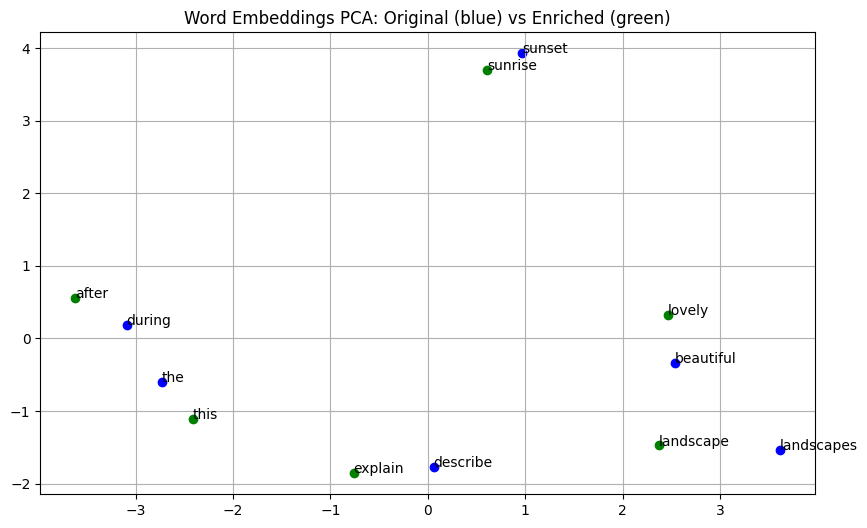

Device set to use cpu
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



--- Original Prompt ---
Describe the beautiful landscapes during sunset. The landscape is a little unusual in that the trees are usually quite tall and dark and the slopes are very steep. The scenery is very beautiful.

The beautiful landscapes during sunset. The landscape is a little unusual in that the trees are usually quite

--- Enriched Prompt ---
explain this lovely landscape after sunrise and sunset, and then we can see that it has been beautifully laid out.

As you can see, the picture above shows the forest, the lake/forest, and the forest canopy. All the trees, bushes, and plants have been


In [4]:

import gensim.downloader as api
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from transformers import pipeline, set_seed

embedding_model = api.load("glove-wiki-gigaword-100")
original_prompt = "Describe the beautiful landscapes during sunset."


def enrich_prompt(prompt, model, topn=1):
    original_words, enriched_words = [], []
    for word in prompt.split():
        clean = word.lower().strip(".,!?")
        if clean in model:
            original_words.append(clean)
            enriched_words += [w[0] for w in model.most_similar(clean, topn=topn)]
    return original_words, enriched_words

original_words, enriched_words = enrich_prompt(original_prompt, embedding_model)
enriched_prompt = " ".join(enriched_words)

# PCA plot
all_words = original_words + enriched_words
vectors = [embedding_model[word] for word in all_words]
reduced = PCA(n_components=2).fit_transform(vectors)

plt.figure(figsize=(10, 6))
for i, word in enumerate(all_words):
    plt.scatter(reduced[i, 0], reduced[i, 1], color='blue' if word in original_words else 'green')
    plt.annotate(word, (reduced[i, 0], reduced[i, 1]))
plt.title("Word Embeddings PCA: Original (blue) vs Enriched (green)")
plt.grid(True)
plt.show()


generator = pipeline("text-generation", model="gpt2")
set_seed(42)
orig_resp = generator(original_prompt, max_new_tokens=50, truncation=True)[0]['generated_text']
enrich_resp = generator(enriched_prompt, max_new_tokens=50, truncation=True)[0]['generated_text']


print("\n--- Original Prompt ---")
print('\n'.join(orig_resp.splitlines()[:5]))

print("\n--- Enriched Prompt ---")
print('\n'.join(enrich_resp.splitlines()[:5]))


# 5. Use word embeddings to create meaningful sentences for creative tasks. Retrieve similar words for a seed word. Create a sentence or story using these words as a starting point. Write a program that: Takes a seed word. Generates similar words. Constructs a short paragraph using these words.

In [5]:


import gensim.downloader as api  
from gensim.models import KeyedVectors  
import random  #


model = api.load("glove-wiki-gigaword-100")


def generate_similar_words(seed_word, topn=10):
    if seed_word in model:
        return [word for word, _ in model.most_similar(seed_word, topn=topn)]
    else:
        return []

def create_paragraph(seed_word):
    similar_words = generate_similar_words(seed_word, topn=10)
    
    if not similar_words:
        return f"No similar words found for '{seed_word}'."

    print(f"\nTop similar words to '{seed_word}':")
    for i, word in enumerate(similar_words, 1):
        print(f"{i}. {word}")


    random.shuffle(similar_words)
    selected_words = similar_words[:5]

    
    paragraph = f"\nIn a world defined by '{seed_word}', "
    paragraph += f"people found themselves surrounded by concepts like {', '.join(selected_words[:-1])}, and {selected_words[-1]}. "
    paragraph += f"These ideas shaped the way they thought, acted, and dreamed. Every step forward in their journey reflected the essence of '{seed_word}', "
    paragraph += f"bringing them closer to understanding the true meaning of {selected_words[0]}."

    return paragraph

seed = "court"  
print(create_paragraph(seed))



Top similar words to 'court':
1. judge
2. appeals
3. supreme
4. courts
5. trial
6. case
7. appeal
8. judges
9. verdict
10. hearing

In a world defined by 'court', people found themselves surrounded by concepts like judges, case, supreme, verdict, and hearing. These ideas shaped the way they thought, acted, and dreamed. Every step forward in their journey reflected the essence of 'court', bringing them closer to understanding the true meaning of judges.


# 6. Use a pre-trained Hugging Face model to analyze sentiment in text. Assume a real-world application, Load the sentiment analysis pipeline. Analyze the sentiment by giving sentences to input. 

In [5]:
from transformers import pipeline


model_name = "distilbert/distilbert-base-uncased-finetuned-sst-2-english"


sentiment_analyzer = pipeline("sentiment-analysis", model=model_name)

sentences = [
    "I love using Hugging Face models, they are amazing!",
    "The weather today is terrible and I feel so sad.",
    "This is the best day of my life!",
    "I'm not sure how I feel about this."
]

results = sentiment_analyzer(sentences)

for sentence, result in zip(sentences, results):
    print(f"Sentence: {sentence}")
    print(f"Sentiment: {result['label']}, Confidence: {result['score']:.4f}")
    print("-" * 50)


Device set to use cpu


Sentence: I love using Hugging Face models, they are amazing!
Sentiment: POSITIVE, Confidence: 0.9999
--------------------------------------------------
Sentence: The weather today is terrible and I feel so sad.
Sentiment: NEGATIVE, Confidence: 0.9992
--------------------------------------------------
Sentence: This is the best day of my life!
Sentiment: POSITIVE, Confidence: 0.9999
--------------------------------------------------
Sentence: I'm not sure how I feel about this.
Sentiment: NEGATIVE, Confidence: 0.9992
--------------------------------------------------


# 7. Summarize long texts using a pre-trained summarization model using Hugging face model. Load the summarization pipeline. Take a passage as input and obtain the summarized text. 

In [7]:
from transformers import pipeline


model_name = "sshleifer/distilbart-cnn-12-6"


summarizer = pipeline("summarization", model=model_name)

passage = """
The Hugging Face Transformers library provides an easy-to-use interface for various natural language processing tasks, including text summarization. 
It leverages pre-trained models like BERT, GPT, and T5 to generate concise summaries of long texts. 
These models are trained on large datasets and can produce high-quality summaries that capture the main points of the input text. 
To use the summarization pipeline, you simply need to load the model and pass the text you want to summarize. 
The pipeline will handle the rest, returning a summarized version of the text.
"""

summary = summarizer(passage, max_length=50, min_length=25, do_sample=False)
print(summary[0]['summary_text'])


Device set to use cpu


 The Hugging Face Transformers library provides an easy-to-use interface for various natural language processing tasks . It leverages pre-trained models like BERT, GPT, and T5 to generate concise summaries .


# 8. Install langchain, cohere (for key), langchain-community. Get the api key( By logging into Cohere and obtaining the cohere key). Load a text document from your google drive . Create a prompt template to display the output in a particular manner. 

In [15]:
import os
import io
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload
from langchain_core.prompts import PromptTemplate
from langchain_core.runnables import RunnableSequence
from langchain_cohere import ChatCohere  

os.environ["COHERE_API_KEY"] = "lNH1WBwJ4s3yb21gdHnT6plPPcmOiY3FvkQvFe9g"

def load_text_file(file_id):
    creds = InstalledAppFlow.from_client_secrets_file(
        'ab.json', ['https://www.googleapis.com/auth/drive.readonly']
    ).run_local_server(port=0)

    service = build('drive', 'v3', credentials=creds)
    request = service.files().get_media(fileId=file_id)
    fh = io.BytesIO()
    MediaIoBaseDownload(fh, request).next_chunk()
    fh.seek(0)
    return fh.read().decode()

file_id = "17SchNh4A-rhXdJm4t0Gp47cDvfrZS-Qh"
doc_text = load_text_file(file_id)
print("📂 File Content from Google Drive:\n")
print(doc_text)


template = """
📄 Document Summary:

{content}
https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=580062733907-5vulteuj6un97sr0knrmnekl0d58s4d5.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A63549%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.readonly&state=ke5SnKPCWh1H8q2Jkn0rgUp25ARIBu&access_type=offline
🧠 Summarize the document above and list the 3 most important insights clearly:
"""
prompt = PromptTemplate.from_template(template)

llm = ChatCohere(cohere_api_key=os.environ["COHERE_API_KEY"])


chain = prompt | llm


result = chain.invoke({"content": doc_text})

print("\n✅ Output:\n")
print(result.content if hasattr(result, 'content') else result)





Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=580062733907-5vulteuj6un97sr0knrmnekl0d58s4d5.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A63549%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.readonly&state=ke5SnKPCWh1H8q2Jkn0rgUp25ARIBu&access_type=offline
📂 File Content from Google Drive:

nstall langchain, cohere (for key), langchain-community. Get the api key( By logging into Cohere and obtaining the cohere key). Load a text document from your google drive . Create a prompt template to display the output in a particular manner. 

✅ Output:

**Summary:**  
The document outlines steps to set up a workflow involving LangChain, Cohere, and Google Drive. It instructs users to install necessary libraries (`langchain`, `cohere`, `langchain-community`), obtain a Cohere API key, load a text document from Google Drive, and create a prompt template to format the output.

**3 Most Importan

# 9. Take the Institution name as input. Use Pydantic to define the schema for the desired output and create a custom parser. Invoke the Chain and Fetch Results. Extract the below Institution related details from Wikipedia: The founder of the Institution. When it was founded. The current branches in the institution . How many employees are working in it. A brief 4-line summary of the institution.  

In [11]:
import wikipedia
import requests
from bs4 import BeautifulSoup

def fetch_info(name):
    try:
        page = wikipedia.page(name)
        summary = wikipedia.summary(name, sentences=2)
        url = page.url
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        rows = soup.select('.infobox tr')

        f , h , e= "Not Found" , "Not Found","Not Found"

        for row in rows:
            th, td = row.find("th"),row.find("td")
            if not th or not td:continue

            text = th.text.lower()

            if "founded" in text or "established" in text:
                f = td.text.strip()

            if "headquarters" in text or "location" in text:
                h = td.text.strip()

            elif "employees" in text or "number of employees" in text:
                e = td.text.strip()

        known_branches = ["New York", "London", "Tokyo", "Bangalore", "Davangere"]
        b = [city for city in known_branches if city.lower() in page.content.lower()]
        branches = ", ".join(b) if b else "Not Found"

        return f"\nInstitution: {name}\nFounded: {f}\nHeadquarters: {h}\nBranches: {branches}\nemploy: {e}\nSummary: {summary}"

    except wikipedia.exceptions.DisambiguationError as e:
        return f"Disambiguation Error: {e.options[:3]}"
    except wikipedia.exceptions.PageError:
        return f"No page found for '{name}'"

#
if __name__ == "__main__":
    name = input("Enter institution name: ")
    print(fetch_info(name))


Enter institution name:   Visvesvaraya Technological University



Institution:  Visvesvaraya Technological University
Founded: 1 April 1998; 27 years ago (1998-04-01)[1][2]
Headquarters: Belagavi, Karnataka, Karnataka, India15°46′43.72″N 74°27′43.53″E﻿ / ﻿15.7788111°N 74.4620917°E﻿ / 15.7788111; 74.4620917
Branches: Bangalore, Davangere
employ: Not Found
Summary: Visvesvaraya Technological University (VTU), is a collegiate public state university in Belagavi, Karnataka established by the Government of Karnataka. It is one of the largest Technological Universities in India with 26 years of Tradition of excellence in Engineering & Technical Education, Research and Innovations.


# 10 Build a chatbot for the Indian Penal Code. We'll start by downloading the official Indian Penal Code document, and then we'll create a chatbot that can interact with it. Users will be able to ask questions about the Indian Penal Code and have a conversation with it. 


In [ ]:
#### import json

def load_ipc_data(file_path="ipc.json"):
    with open(file_path, "r", encoding="utf-8") as file:
        return json.load(file)

def get_section_details(ipc_data, section_number):
    section_number = section_number.lower().replace("section", "").strip()
    for entry in ipc_data:
        if str(entry.get("Section")).lower() == section_number:
            return entry
    return None

def ipc_chatbot():
    ipc_data = load_ipc_data()
    print("\n⚖️ Welcome to the IPC Chatbot! Ask about any IPC section (e.g., 'Tell me about Section 6'). Type 'exit' to quit.\n")
    
    while True:
        user_input = input("You: ").strip().lower()

        if user_input == "exit":
            print("👋 Goodbye!")
            break

        words = user_input.split()
        section_number = None
        for i in range(len(words) - 1):
            if words[i] == "section":
                section_number = words[i + 1]
                break

        
        if section_number:
            details = get_section_details(ipc_data, section_number)
            if details:
                print(f"""
    Chapter {details['chapter']}: {details['chapter_title'].capitalize()}
    Section {details['Section']}: {details['section_title']}
    Description: {details['section_desc']}
""")
            else:
                print(f"⚠️ Section {section_number} not found in IPC data.")
        else:
            print("🤔 Please mention a section number (e.g., 'Tell me about Section 6').")

if __name__ == "__main__":
    ipc_chatbot()



⚖️ Welcome to the IPC Chatbot! Ask about any IPC section (e.g., 'Tell me about Section 6'). Type 'exit' to quit.



You:  Tell me about Section 6



📘 Chapter 2: General explanations
📖 Section 6: Definitions in the Code to be understood subject to exceptions
📝 Description: Throughout this Code every definition of an Offence, every penal provision and every illustration of every such definition or penal provision, shall be understood subject to the exceptions contained in the Chapter entitled “General Exceptions”, though those exceptions are not repeated in such definition, penal provision, or illustration.

